In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

In [3]:
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             692703 non-null  int64  
 1    Flow Duration                692703 non-null  int64  
 2    Total Fwd Packets            692703 non-null  int64  
 3    Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets   692703 non-null  int64  
 5    Total Length of Bwd Packets  692703 non-null  int64  
 6    Fwd Packet Length Max        692703 non-null  int64  
 7    Fwd Packet Length Min        692703 non-null  int64  
 8    Fwd Packet Length Mean       692703 non-null  float64
 9    Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max         692703 non-null  int64  
 11   Bwd Packet Length Min        692703 non-null  int64  
 12   Bwd Packet Length Mean       692703 non-nul

In [5]:
data.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [6]:
X = data.drop([' Label'],axis=1)
y=data[' Label']

In [7]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Feature Selection

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature_selection = SelectKBest(score_func=f_classif)

In [9]:
feature_selection.fit(X,y)
feature_value=pd.DataFrame(feature_selection.scores_,columns=['Score Value'])
feature_colume_name = pd.DataFrame(X.columns,columns=['Name'])
allFeature = pd.concat([feature_colume_name,feature_value],axis=1)
allFeature

C:\Users\sajee\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\sajee\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Name,Score Value
0,Destination Port,10906.402269
1,Flow Duration,46160.896397
2,Total Fwd Packets,28.605797
3,Total Backward Packets,11.190237
4,Total Length of Fwd Packets,150.762865
...,...,...
73,Active Min,57774.422510
74,Idle Mean,94808.266350
75,Idle Std,4863.314898
76,Idle Max,95378.273613


In [10]:
top_feature = allFeature.nlargest(68,'Score Value')
pd.set_option('display.max_rows', top_feature.shape[0]+1)
top_feature

,Name,Score Value
12,Bwd Packet Length Mean,112023.055569
54,Avg Bwd Segment Size,112023.055569
13,Bwd Packet Length Std,108310.460441
10,Bwd Packet Length Max,106125.975216
22,Fwd IAT Std,102698.643712
41,Packet Length Std,101429.543374
76,Idle Max,95378.273613
74,Idle Mean,94808.266350
39,Max Packet Length,94126.516748
23,Fwd IAT Max,93922.655112


In [11]:
top_feature.tail(18)

,Name,Score Value
37,Bwd Packets/s,1088.718078
14,Flow Bytes/s,714.687787
9,Fwd Packet Length Std,383.230174
6,Fwd Packet Length Max,208.756825
4,Total Length of Fwd Packets,150.762865
63,Subflow Fwd Bytes,150.762865
34,Fwd Header Length,62.827916
55,Fwd Header Length.1,62.827916
2,Total Fwd Packets,28.605797
62,Subflow Fwd Packets,28.605797


# Drop features Based on there Score

In [12]:
X = data.drop([' Fwd Packet Length Std',' Fwd Packet Length Max','Total Length of Fwd Packets',' Subflow Fwd Bytes',' Fwd Header Length',' Fwd Header Length.1',' Total Fwd Packets','Subflow Fwd Packets',' ECE Flag Count',' RST Flag Count',' Subflow Bwd Bytes',' Total Length of Bwd Packets',' Bwd Header Length',' Total Backward Packets',' Subflow Bwd Packets',
                 ' act_data_pkt_fwd',' Label',' SYN Flag Count','Fwd PSH Flags',' URG Flag Count','Fwd Packets/s',' Idle Std',' Flow Packets/s','Bwd IAT Total',
              ' Init_Win_bytes_backward',' Avg Fwd Segment Size',' Fwd Packet Length Mean',' Bwd Packets/s','Flow Bytes/s'],axis=1)

In [13]:
X

,Destination Port,Flow Duration,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,...,Bwd Avg Bulk Rate,Init_Win_bytes_forward,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Max,Idle Min
0,80,38308,6,6,6,6.000000,0.000000,38308.000000,0.000000,38308,...,0,255,20,0.0,0.0,0,0,0.0,0,0
1,389,479,0,163,0,65.200000,89.278777,31.933333,25.510409,73,...,0,29200,32,0.0,0.0,0,0,0.0,0,0
2,88,1095,0,1575,0,525.000000,813.326503,73.000000,204.960972,810,...,0,29200,32,0.0,0.0,0,0,0.0,0,0
3,389,15206,0,3069,0,555.000000,977.480342,543.071429,2519.931377,13391,...,0,29200,32,0.0,0.0,0,0,0.0,0,0
4,88,1092,0,1576,0,525.333333,813.842901,78.000000,207.000929,794,...,0,29200,32,0.0,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,28,76,76,76.000000,0.000000,6443.000000,13617.579480,30780,...,0,-1,20,0.0,0.0,0,0,0.0,0,0
692699,53,324,42,181,181,181.000000,0.000000,108.000000,183.597386,320,...,0,-1,20,0.0,0.0,0,0,0.0,0,0
692700,58030,82,0,6,6,6.000000,0.000000,41.000000,52.325902,78,...,0,1006,32,0.0,0.0,0,0,0.0,0,0
692701,53,1048635,32,128,128,128.000000,0.000000,149805.000000,375521.040500,1000947,...,0,-1,20,0.0,0.0,0,0,0.0,0,0


In [14]:
y

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
692698    BENIGN
692699    BENIGN
692700    BENIGN
692701    BENIGN
692702    BENIGN
Name:  Label, Length: 692703, dtype: object

# Model Test Using ML Algorithm

# KNN

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

In [16]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
knn.score(X_test, y_test)

Test set predictions:
 ['DoS Hulk' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'DoS GoldenEye']


0.9882922463199735

# Cross-validation K-fold

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(10)
cvs = cross_val_score(knn,X,y,cv=kfold)
cvs

array([0.90177708, 0.88433832, 0.99015461, 0.98524614, 0.87164718,
       0.98986574, 0.98946153, 0.99445647, 0.99256532, 0.99226216])

In [18]:
cvs.mean()

0.9591774559405053

# Accuracy score

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9882922463199735

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[130360,     90,   1102,    105,    138,      0],
       [   169,   2903,      2,      3,      3,      0],
       [   538,      1,  69084,      0,      4,      0],
       [    47,      3,      0,   1519,     63,      0],
       [   111,      0,     30,     22,   1512,      0],
       [     2,      0,      0,      0,      0,      0]], dtype=int64)

# Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

C:\Users\sajee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          BENIGN       0.99      0.99      0.99    131795
   DoS GoldenEye       0.97      0.94      0.96      3080
        DoS Hulk       0.98      0.99      0.99     69627
DoS Slowhttptest       0.92      0.93      0.93      1632
   DoS slowloris       0.88      0.90      0.89      1675
      Heartbleed       0.00      0.00      0.00         2

        accuracy                           0.99    207811
       macro avg       0.79      0.79      0.79    207811
    weighted avg       0.99      0.99      0.99    207811



# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
lr.score(X_test, y_test)

C:\Users\sajee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set predictions:
 ['DoS Hulk' 'BENIGN' 'BENIGN' ... 'DoS Hulk' 'BENIGN' 'DoS GoldenEye']


0.7482375812637445

In [23]:
cvs_lr = cross_val_score(lr,X,y,cv=kfold)
cvs_lr
cvs_lr.mean()

C:\Users\sajee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sajee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7179081772547631

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7482375812637445

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

C:\Users\sajee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          BENIGN       0.81      0.80      0.80    131795
   DoS GoldenEye       0.35      0.76      0.48      3080
        DoS Hulk       0.68      0.67      0.67     69627
DoS Slowhttptest       0.81      0.70      0.75      1632
   DoS slowloris       0.66      0.30      0.41      1675
      Heartbleed       0.00      0.00      0.00         2

        accuracy                           0.75    207811
       macro avg       0.55      0.54      0.52    207811
    weighted avg       0.76      0.75      0.75    207811



# Decision TreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
dr= DecisionTreeClassifier(max_depth=2, random_state=21)
dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
dr.score(X_test, y_test)

Test set predictions:
 ['DoS Hulk' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']


0.8910837251156098

In [27]:
cvs_dr = cross_val_score(dr,X,y,cv=kfold)
cvs_dr.mean()

0.8731954460374046

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8910837251156098

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

C:\Users\sajee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          BENIGN       0.98      0.88      0.93    131795
   DoS GoldenEye       0.00      0.00      0.00      3080
        DoS Hulk       0.77      1.00      0.87     69627
DoS Slowhttptest       0.00      0.00      0.00      1632
   DoS slowloris       0.00      0.00      0.00      1675
      Heartbleed       0.00      0.00      0.00         2

        accuracy                           0.89    207811
       macro avg       0.29      0.31      0.30    207811
    weighted avg       0.88      0.89      0.88    207811



# Naive Bayes

In [30]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
bnb=BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
bnb.score(X_test, y_test)

Test set predictions:
 ['DoS Hulk' 'DoS GoldenEye' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']


0.7300094797676735

In [31]:
cvs_bnb = cross_val_score(bnb,X,y,cv=kfold)
cvs_bnb.mean()

0.7216327697892817

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7300094797676735

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

          BENIGN       0.92      0.81      0.86    131795
   DoS GoldenEye       0.09      0.55      0.15      3080
        DoS Hulk       0.95      0.61      0.75     69627
DoS Slowhttptest       0.03      0.52      0.06      1632
   DoS slowloris       0.04      0.05      0.05      1675
      Heartbleed       0.03      1.00      0.05         2

        accuracy                           0.73    207811
       macro avg       0.34      0.59      0.32    207811
    weighted avg       0.91      0.73      0.80    207811



# RandomForestClassifier

In [34]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
rfc.score(X_test, y_test)

Test set predictions:
 ['BENIGN' 'DoS Hulk' 'BENIGN' ... 'DoS Hulk' 'BENIGN' 'BENIGN']


0.9993963043326101

In [ ]:
cvs_rfc = cross_val_score(rfc,X,y,cv=kfold)
cvs_rfc.mean()

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9993963043326101

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

          BENIGN       1.00      1.00      1.00    145306
   DoS GoldenEye       0.99      1.00      1.00      3379
        DoS Hulk       1.00      1.00      1.00     76245
DoS Slowhttptest       1.00      0.99      0.99      1818
   DoS slowloris       0.99      1.00      0.99      1840
      Heartbleed       1.00      1.00      1.00         4

        accuracy                           1.00    228592
       macro avg       1.00      1.00      1.00    228592
    weighted avg       1.00      1.00      1.00    228592



# Diagram

# For classification report

In [6]:
data_diagram = pd.read_csv('CICID2017-ClasRep.csv')
data_diagram

,Algorithm,classification_report,Score
0,KNeighbors,precision,0.99
1,KNeighbors,recall,0.99
2,KNeighbors,f1-score,0.99
3,LogisticRegression,precision,0.76
4,LogisticRegression,recall,0.75
5,LogisticRegression,f1-score,0.75
6,DecisionTree,precision,0.88
7,DecisionTree,recall,0.89
8,DecisionTree,f1-score,0.88
9,naive_bayes,precision,0.91


Text(0, 0.5, 'value')

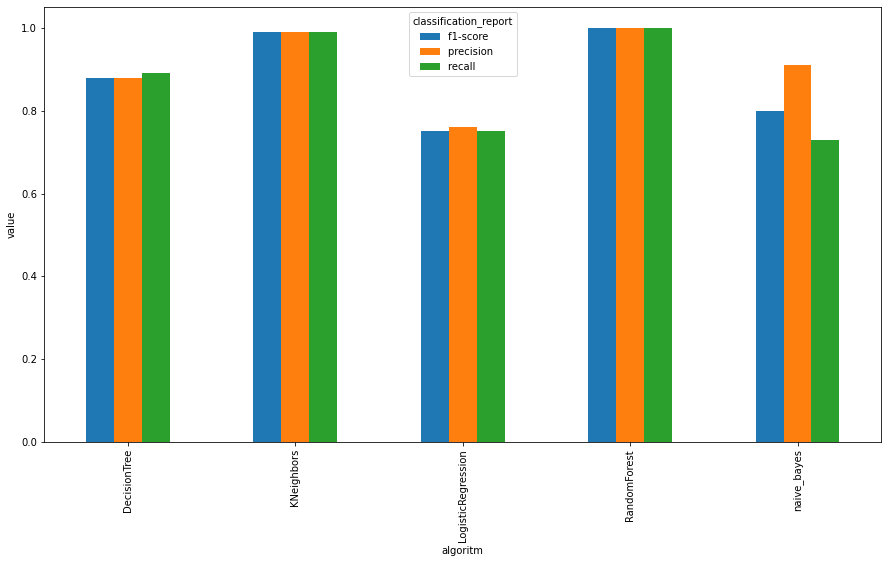

In [7]:
data_diagram.pivot(index='Algorithm', columns='classification_report', values='Score').plot(kind='bar',figsize=(15, 8))
plt.xlabel('algoritm')
plt.ylabel('value')

# Accuracy

In [4]:
data_diagram1 = pd.read_csv('Accuray.csv')
data_diagram1

,Algorithm,accuracy
0,KNeighbors,0.9882
1,LogisticRegression,0.7482
2,DecisionTree,0.8910
3,naive_bayes,0.7300
4,RandomForest,0.9993


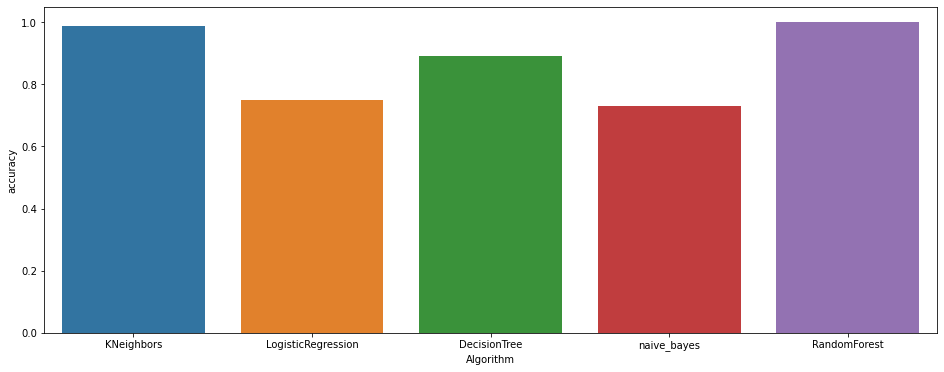

In [5]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Algorithm',y='accuracy',data=data_diagram1)